# Decision Tree Classifier

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

## Daten

In [2]:
data_train = pd.DataFrame([[1,1,0,1],[0,0,0,0],[0,0,1,1],[1,0,0,0],[0,1,1,0],[1,0,1,1],[1,0,1,1],[1,1,0,1],[1,0,1,1],[0,1,0,0]],
                    columns=["Hut","Brille","Mund","Verkauft"])
data_test = pd.DataFrame([[0,0,1,1],[0,1,0,0],[1,0,1,1],[1,0,0,0],[0,0,0,1]],
                    columns=["Hut","Brille","Mund","Verkauft"])

x_train = data_train.drop(["Verkauft"],axis=1)
y_train = data_train["Verkauft"]

x_test = data_test.drop(["Verkauft"],axis=1)
y_test = data_test["Verkauft"]

## Base Rate

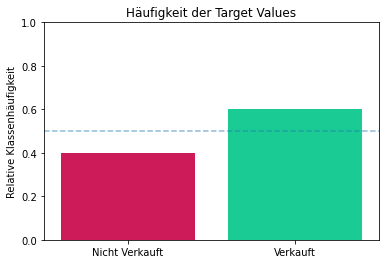

In [3]:
mapping = {0:"Nicht Verkauft",1:"Verkauft"} 
plt.bar(y_train.value_counts().index,y_train.value_counts()/y_train.shape[0],tick_label=y_train.value_counts().index.map(mapping),color=["#1ACC94","#CC1B58"])
plt.hlines(0.5,-0.5,1.5,ls="--",alpha=0.5)
plt.xlim(-0.5,1.5)
plt.ylim(0,1)
plt.title("Häufigkeit der Target Values")
plt.ylabel("Relative Klassenhäufigkeit")
plt.show()

## Entropie

In [4]:
merged_dataframe = pd.concat([x_train,y_train],axis=1)

# Für jedes Attribut (jede Spalte) im Inputdatensatz
for column in x_train:
    # Für jede unqiue Ausprägung in der aktuellen Spalte
    for unique_value in x_train[column].unique():
        entropy_values = []
        # entropy_values uniquen Ausprägungen in Y (0 und 1 in diesem Fall)
        for target_value in y_train.unique():
            pi = merged_dataframe.loc[(merged_dataframe[column] == unique_value) & (merged_dataframe["Verkauft"] == target_value)].shape[0]/merged_dataframe.loc[(merged_dataframe[column] == unique_value)].shape[0]
            entropy_values.append(pi*np.log2(pi))
        entropy = -np.sum(entropy_values)
        print("Entropie für Attribut {} = {}: {:.2f}".format(column,unique_value,entropy))
    
    

Entropie für Attribut Hut = 1: 0.65
Entropie für Attribut Hut = 0: 0.81
Entropie für Attribut Brille = 1: 1.00
Entropie für Attribut Brille = 0: 0.92
Entropie für Attribut Mund = 0: 0.97
Entropie für Attribut Mund = 1: 0.72


## Information Gain

In [5]:
merged_dataframe = pd.concat([x_train,y_train],axis=1)

# Für jedes Attribut (jede Spalte) im Inputdatensatz
for column in x_train:
    # Für jede unqiue Ausprägung in der aktuellen Spalte
    parent_pi1 = merged_dataframe.loc[merged_dataframe["Verkauft"] == 0].shape[0]/merged_dataframe.shape[0]
    parent_pi2 = merged_dataframe.loc[merged_dataframe["Verkauft"] == 1].shape[0]/merged_dataframe.shape[0]
    parent_entropy = -(parent_pi1*np.log2(parent_pi1)+parent_pi2*np.log2(parent_pi2))

    entropies = []
    for unique_value in x_train[column].unique():
        entropy_values = []
        # Alle uniquen Ausprägungen in Y (0 und 1 in diesem Fall)
        for target_value in y_train.unique():
            pi = merged_dataframe.loc[(merged_dataframe[column] == unique_value) & (merged_dataframe["Verkauft"] == target_value)].shape[0]/merged_dataframe.loc[(merged_dataframe[column] == unique_value)].shape[0]
            entropy_values.append(pi*np.log2(pi))
        entropies.append(np.sum(entropy_values)*-1*merged_dataframe.loc[(merged_dataframe[column] == unique_value)].shape[0]/merged_dataframe.shape[0])
    
    print("Information Gain für Attribut {}: {:.2f}".format(column,parent_entropy-np.sum(entropies)))
    

Information Gain für Attribut Hut: 0.26
Information Gain für Attribut Brille: 0.02
Information Gain für Attribut Mund: 0.12


## Decision Tree

In [6]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8

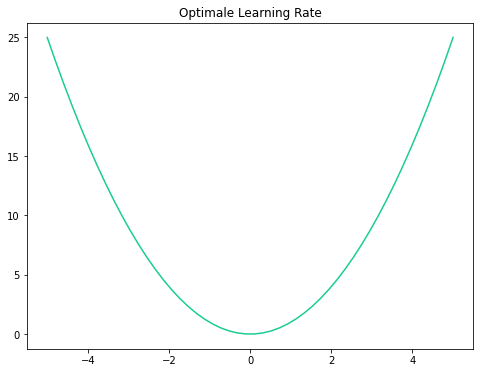

In [7]:
x = np.linspace(-5,5)
y = x**2
plt.figure(figsize=(8,6))
plt.plot(x,y,c="#1ACC94")
plt.title("Optimale Learning Rate")
plt.show()

In [8]:
td = pd.DataFrame([[50,60,1],[30,40,1],[40,30,0],[90,20,0],[20,10,0],[10,20,1],[30,90,1],[70,60,0],[60,70,1],[40,50,1]],
                 columns=["x1","x2","y"])


In [9]:
td

,x1,x2,y
0,50,60,1
1,30,40,1
2,40,30,0
3,90,20,0
4,20,10,0
5,10,20,1
6,30,90,1
7,70,60,0
8,60,70,1
9,40,50,1


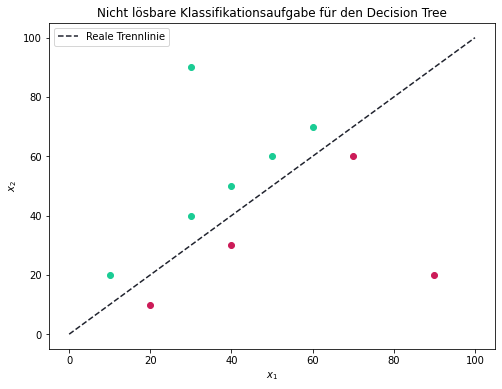

In [10]:
plt.figure(figsize=(8,6))
plt.plot([0,100],[0,100],c="#20232E",label="Reale Trennlinie",ls="--")
plt.scatter(td.loc[td["y"]==0]["x1"],td.loc[td["y"]==0]["x2"],c="#CC1B58")
plt.scatter(td.loc[td["y"]==1]["x1"],td.loc[td["y"]==1]["x2"],c="#1ACC94")
plt.legend()
plt.title("Nicht lösbare Klassifikationsaufgabe für den Decision Tree")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()